# Handwritten Digit Recognition using Two-Layer Feedforward Neural Networks in TensorFlow with Keras

## 1. Importing Modules and Loading the MNIST Data

In [1]:
from keras.datasets import mnist
from keras.utils import np_utils
from keras.layers import Dense
from keras.models import Sequential
from keras.callbacks import EarlyStopping
import time
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

## 2. Reshaping and Normalization

In [3]:
img_rows, img_cols = 28, 28

in_size = img_rows * img_cols
out_size = 10

In [4]:
x_train = x_train.reshape(-1, in_size).astype('float32') / 255
x_test = x_test.reshape(-1, in_size).astype('float32') / 255

In [5]:
x_train.shape

(60000, 784)

In [6]:
# x_train[0]

In [7]:
# one-hot encoding
y_train = np_utils.to_categorical(y_train.astype('int32'), out_size) 
y_test = np_utils.to_categorical(y_test.astype('int32'), out_size)

In [8]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

## 3. Modeling

In [9]:
units = 16
# units = 512
# activation = 'sigmoid'
activation = 'relu'

optimizer = 'adam'

In [10]:
model = Sequential()
model.add(Dense(units, activation=activation, input_dim=in_size))
model.add(Dense(out_size, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer=optimizer,
             metrics=['accuracy'])

## 4. Fitting

In [11]:
batch_size = 1000
epochs = 100

callbacks = [
    EarlyStopping(patience=0, verbose=1)
]

In [12]:
start_time = time.time()

history = model.fit(x_train,
                    y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=0,
                    validation_split=0.1,
                    callbacks=callbacks)

score = model.evaluate(x_test, y_test, verbose=1)

print('Executed in {0:.3f}s'.format(time.time() - start_time))

Epoch 00032: early stopping
10000/10000 [==============================] - 0s 31us/step
Executed in 12.006s


## 5. Evaluation

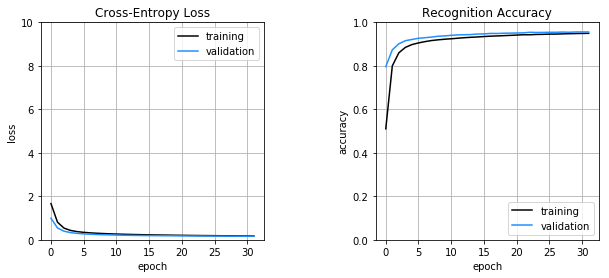

Test loss:  0.19338827797621488
Test accuracy:  0.9443


In [13]:
plt.figure(1, figsize=(10, 4))
plt.subplots_adjust(wspace=0.5)

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='training', color='black')
plt.plot(history.history['val_loss'], label='validation', color='dodgerblue')
plt.legend()
plt.ylim(0, 10)
plt.grid()
plt.title('Cross-Entropy Loss')
plt.xlabel('epoch')
plt.ylabel('loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['acc'], label='training', color='black')
plt.plot(history.history['val_acc'], label='validation', color='dodgerblue')
plt.legend(loc='lower right')
plt.ylim(0, 1)
plt.grid()
plt.title('Recognition Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')

plt.show()

print('Test loss: ', score[0])
print('Test accuracy: ', score[1])

## 6. Test

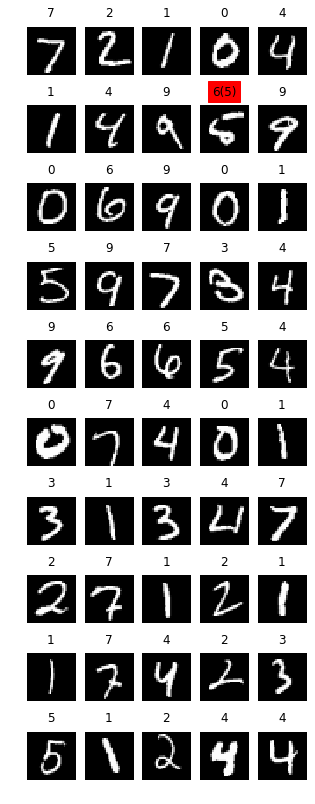

In [14]:
test_count = 50
y_predict = model.predict(x_test)

plt.figure(1, figsize=(5, 14))
plt.subplots_adjust(hspace=0.4)

for i in range(test_count):
    plt.subplot(10, 5, i + 1)
    x = x_test[i, :].reshape(28, 28)
    y = y_predict[i, :]
    prediction = np.argmax(y)
    label = np.argmax(y_test[i, :])
    if prediction == label:
        plt.title(prediction, pad=10)
    else:
        plt.title('{}({})'.format(prediction, label), pad=10,
                  backgroundcolor='red')
    plt.axis('off')
    plt.imshow(x, cmap='gray') 

plt.show()

## 7. Visualizing Weights

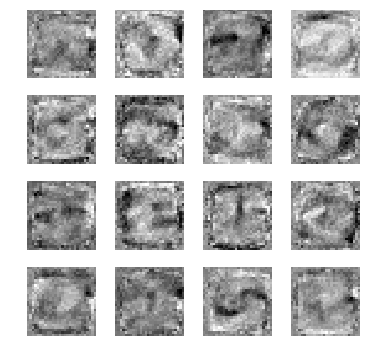

In [15]:
weights = model.layers[0].get_weights()[0]

columns = 4
rows = math.ceil(units / columns)
plt.figure(1, figsize=(columns * 1.5, rows * 1.5))
plt.subplots_adjust(wspace=0.25, hspace=0.25)

for i in range(weights.shape[-1]):
    plt.subplot(rows, columns, i + 1)
    w = weights[:, i].reshape(img_rows, img_cols)
    plt.axis('off')
    plt.imshow(w, cmap='gray')
 
plt.show()